<a href="https://colab.research.google.com/github/Relo02/Visual-Inertia-Odometry/blob/main/Visual_Odometry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# depth estimation dataset
#!unzip "/content/drive/MyDrive/Mid-Air-dataset/Kite_training/sunny/depth/trajectory_0000/frames.zip" -d "/content/drive/MyDrive/Mid-Air-dataset/Kite_training/sunny/depth/trajectory_0000/"

In [ ]:
# color_down images
#!unzip "/content/drive/MyDrive/Mid-Air-dataset/Kite_training/sunny/color_down/trajectory_0000/frames.zip" -d "/content/drive/MyDrive/Mid-Air-dataset/Kite_training/sunny/color_down/trajectory_0000/"

In [ ]:
# Load the groundtruth pose from dataset
#!unzip "/content/drive/MyDrive/Mid-Air-dataset/Kite_training/sunny/sensor_records.zip" -d "/content/drive/MyDrive/Mid-Air-dataset/Kite_training/sunny"

In [ ]:
import h5py

sensor_path_readings = "/content/drive/MyDrive/Mid-Air-dataset/Kite_training/sunny/sensor_records.hdf5"

with h5py.File(sensor_path_readings, 'r') as f:
    keys_list = list(f.keys())          # Get all top-level keys as a list
    specific_key = keys_list[0]         # Access the first key (trajectory_0000)
    print(f"Keys within group '{specific_key}': {list(f[specific_key].keys())}") # Print keys within the trajectory_0000 group
    groundtruth_group = f[specific_key]['groundtruth']
    print(f"Type of 'groundtruth' object: {type(groundtruth_group)}")
    print(f"Keys within group 'groundtruth': {list(groundtruth_group.keys())}") # Print keys within the groundtruth group
    groundtruth_position_data = f[specific_key]['groundtruth']['position'][()]  # Access the 'position' dataset within the groundtruth group

print("\nGroundtruth Position data:")
print(groundtruth_position_data[10]) # Print the first element of the position dataset
print(groundtruth_position_data[11])

Keys within group 'trajectory_0000': ['camera_data', 'gps', 'groundtruth', 'imu']
Type of 'groundtruth' object: <class 'h5py._hl.group.Group'>
Keys within group 'groundtruth': ['acceleration', 'angular_velocity', 'attitude', 'position', 'velocity']

Groundtruth Position data:
[1.56413102 0.28029545 0.20349882]
[1.72113552 0.30765796 0.2239358 ]


In [ ]:
# Creating consecutive tuples frames
pairs = [(rgb_images[i], rgb_images[i+1]) for i in range(len(rgb_images)-1)]

# Print the first pair for testing
print(pairs[0])

(array([[[163, 115, 103],
        [187, 139, 125],
        [101,  53,  39],
        ...,
        [ 36,  52,  51],
        [ 35,  51,  50],
        [ 35,  51,  50]],

       [[142,  94,  80],
        [192, 144, 130],
        [104,  57,  41],
        ...,
        [ 35,  51,  50],
        [ 35,  51,  50],
        [ 34,  50,  49]],

       [[165, 118, 102],
        [173, 126, 108],
        [155, 108,  90],
        ...,
        [ 34,  50,  49],
        [ 34,  50,  49],
        [ 34,  50,  49]],

       ...,

       [[150, 145,  28],
        [136, 131,  14],
        [148, 143,  26],
        ...,
        [ 46,  70,  80],
        [ 42,  67,  74],
        [ 37,  62,  69]],

       [[161, 158,  43],
        [142, 139,  24],
        [142, 139,  24],
        ...,
        [ 46,  70,  80],
        [ 41,  66,  73],
        [ 34,  59,  64]],

       [[163, 160,  45],
        [148, 145,  30],
        [134, 131,  16],
        ...,
        [ 43,  68,  75],
        [ 40,  65,  72],
        [ 37,  62,  67]

In [ ]:
# Get IMU data from mid-air
with h5py.File(sensor_path_readings, 'r') as f:
    keys_list = list(f.keys())          # Get all top-level keys as a list
    specific_key = keys_list[0]
    imu_group = f[specific_key]['imu']
    print(f"Keys within group 'imu': {list(imu_group.keys())}")
    accel_data = imu_group['accelerometer'][()]
    gyro_data = imu_group['gyroscope'][()]

print("\nIMU data:")
print("accel data: ", accel_data[10])
print("gyro data: ", gyro_data[11])

Keys within group 'imu': ['accelerometer', 'gyroscope']

IMU data:
accel data:  [-1.72310612 -0.07332413 -9.64448694]
gyro data:  [ 0.03577314 -0.00246863  0.01730098]


In [ ]:
# right images
!unzip "/content/drive/MyDrive/Mid-Air-dataset/Kite_training/sunny/color_right/trajectory_0000/frames.zip" -d "/content/drive/MyDrive/Mid-Air-dataset/Kite_training/sunny/color_right/trajectory_0000/"

Archive:  /content/drive/MyDrive/Mid-Air-dataset/Kite_training/sunny/color_right/trajectory_0000/frames.zip
  inflating: /content/drive/MyDrive/Mid-Air-dataset/Kite_training/sunny/color_right/trajectory_0000/000000.JPEG  
  inflating: /content/drive/MyDrive/Mid-Air-dataset/Kite_training/sunny/color_right/trajectory_0000/000001.JPEG  
  inflating: /content/drive/MyDrive/Mid-Air-dataset/Kite_training/sunny/color_right/trajectory_0000/000002.JPEG  
  inflating: /content/drive/MyDrive/Mid-Air-dataset/Kite_training/sunny/color_right/trajectory_0000/000003.JPEG  
  inflating: /content/drive/MyDrive/Mid-Air-dataset/Kite_training/sunny/color_right/trajectory_0000/000004.JPEG  
  inflating: /content/drive/MyDrive/Mid-Air-dataset/Kite_training/sunny/color_right/trajectory_0000/000005.JPEG  
  inflating: /content/drive/MyDrive/Mid-Air-dataset/Kite_training/sunny/color_right/trajectory_0000/000006.JPEG  
  inflating: /content/drive/MyDrive/Mid-Air-dataset/Kite_training/sunny/color_right/trajectory

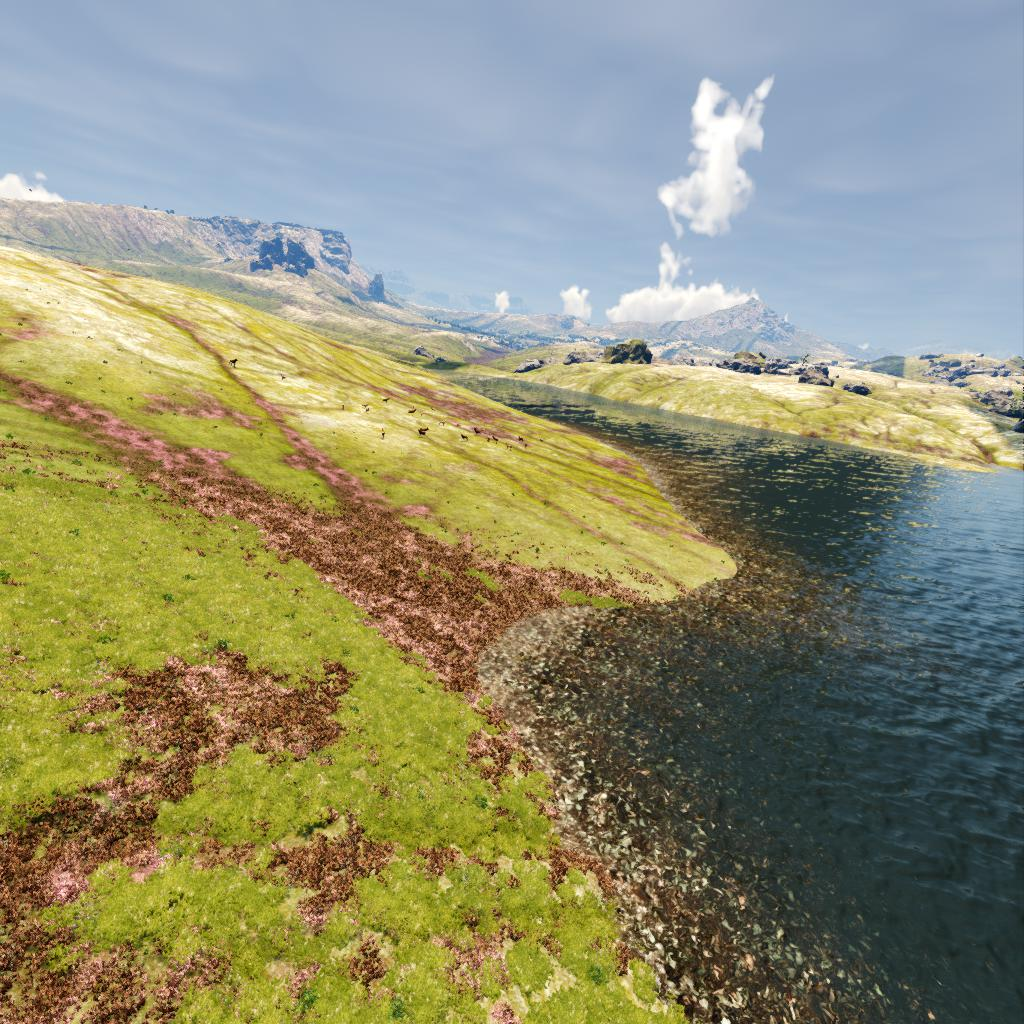

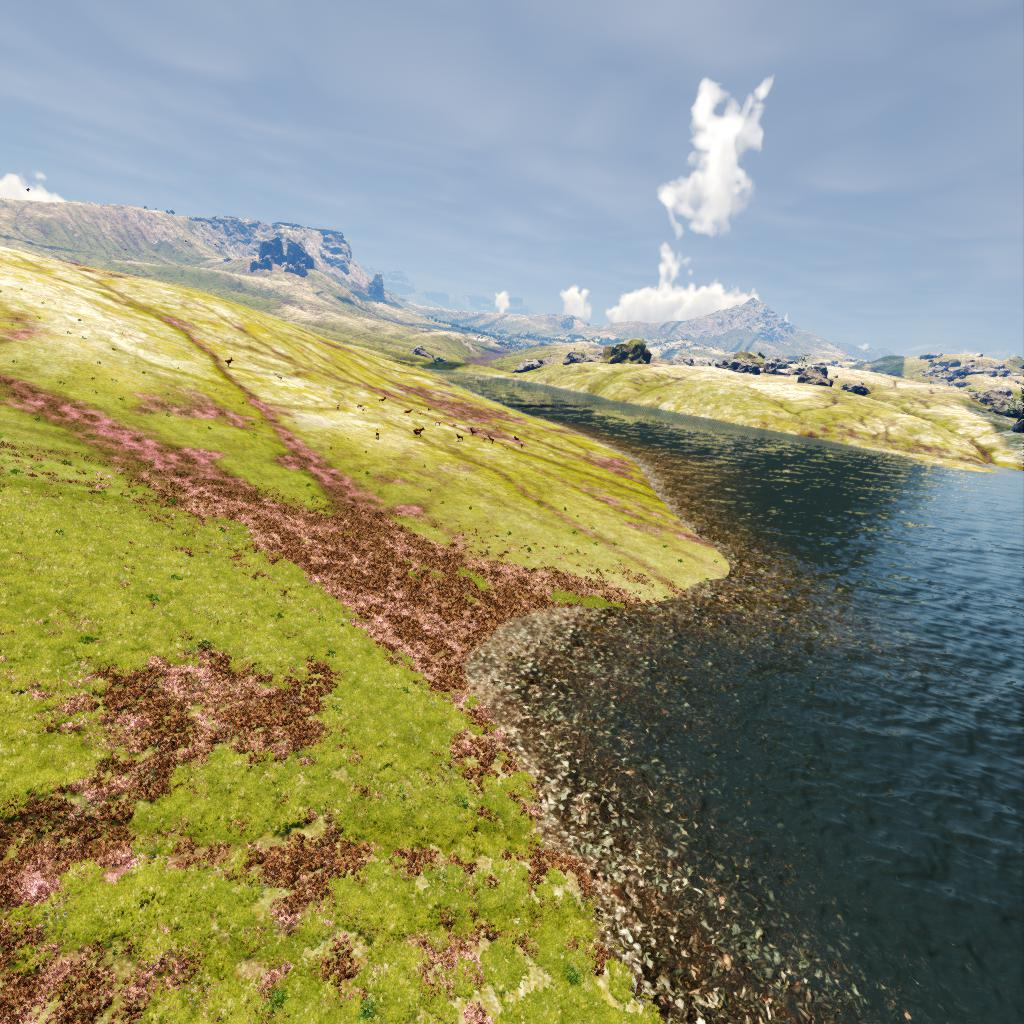

In [ ]:
# Include color left and color right sunny images
trajectory_left_root = '/content/drive/MyDrive/Mid-Air-dataset/Kite_training/sunny/color_left/trajectory_0000'
trajectory_right_root = '/content/drive/MyDrive/Mid-Air-dataset/Kite_training/sunny/color_right/trajectory_0000'

left_img_root = os.path.join(trajectory_left_root, "frames")
#right_img_root = os.path.join(trajectory_right_root, "frames")

left_imgs = sorted([f for f in os.listdir(left_img_root) if f.endswith('.JPEG')])
right_imgs = sorted([f for f in os.listdir(trajectory_right_root) if f.endswith('.JPEG')])
#right_imgs = False

# Example: Display the first left and right images
if left_imgs:
    first_left_img_path = os.path.join(left_img_root, left_imgs[0])
    first_left_img = cv2.imread(first_left_img_path)

    if first_left_img is not None:
        cv2_imshow(first_left_img)
    else:
        print(f"Error loading image: {first_left_img_path}")
else:
    print(f"No image files found in {left_img_root}")

if right_imgs:
    first_right_img_path = os.path.join(trajectory_right_root, right_imgs[0])
    first_right_img = cv2.imread(first_right_img_path)

    if first_right_img is not None:
        cv2_imshow(first_right_img)
    else:
        print(f"Error loading image: {first_right_img_path}")
else:
    print(f"No image files found in {trajectory_right_root}")

In [ ]:
!pip install python-orb-slam3

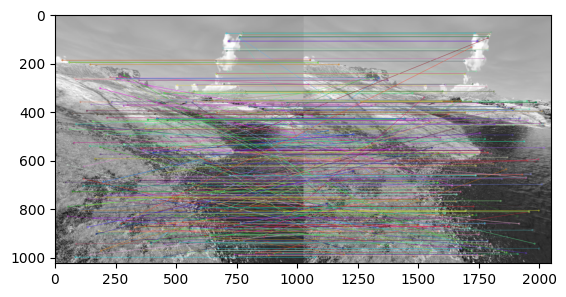

In [ ]:
import cv2
from matplotlib import pyplot as plt
import os

from python_orb_slam3 import ORBExtractor

trajectory_left_root = '/content/drive/MyDrive/Mid-Air-dataset/Kite_training/sunny/color_left/trajectory_0000'
trajectory_right_root = '/content/drive/MyDrive/Mid-Air-dataset/Kite_training/sunny/color_right/trajectory_0000' # Corrected path

left_image_files = sorted([f for f in os.listdir(os.path.join(trajectory_left_root, "frames")) if f.endswith('.JPEG') or f.endswith('.PNG')])
right_image_files = sorted([f for f in os.listdir(trajectory_right_root) if f.endswith('.JPEG') or f.endswith('.PNG')])

# Create a list of tuples with full image paths
pair_image_paths = [(os.path.join(trajectory_left_root, "frames", left_file),
                   os.path.join(trajectory_right_root, right_file))
                  for left_file, right_file in zip(left_image_files, right_image_files)]


orb_extractor = ORBExtractor()
left_descriptors_list = []
right_descriptors_list = []
matches_list = [] # Store matches for each pair

for left_img_path, right_img_path in pair_image_paths:
  left_img = cv2.imread(left_img_path, cv2.IMREAD_GRAYSCALE) # Read as grayscale for ORB
  right_img = cv2.imread(right_img_path, cv2.IMREAD_GRAYSCALE) # Read as grayscale for ORB

  if left_img is None or right_img is None:
      print(f"Warning: Could not load image pair: {left_img_path}, {right_img_path}")
      continue

  left_keypoints, left_descriptors = orb_extractor.detectAndCompute(left_img)
  right_keypoints, right_descriptors = orb_extractor.detectAndCompute(right_img)

  if left_descriptors is None or right_descriptors is None:
      print(f"Warning: Could not detect descriptors for image pair: {left_img_path}, {right_img_path}")
      continue


  left_descriptors_list.append(left_descriptors)
  right_descriptors_list.append(right_descriptors)

  # Match features
  bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
  matches = bf.match(left_descriptors, right_descriptors)
  matches_list.append(matches)

# Draw matches of the first left and right image
if pair_image_paths and left_descriptors_list and right_descriptors_list and matches_list:
    left_first_img = cv2.imread(pair_image_paths[0][0], cv2.IMREAD_GRAYSCALE)
    right_first_img = cv2.imread(pair_image_paths[0][1], cv2.IMREAD_GRAYSCALE)

    # Need to re-detect keypoints for drawing
    left_keypoints_first, _ = orb_extractor.detectAndCompute(left_first_img)
    right_keypoints_first, _ = orb_extractor.detectAndCompute(right_first_img)


    matches_image = cv2.drawMatches(left_first_img, left_keypoints_first, right_first_img, right_keypoints_first, matches_list[0], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Show matches
    plt.imshow(matches_image)
    plt.show()
else:
    print("No image pairs processed or no matches found.")